In [68]:
!pip install polars

In [69]:
import tensorflow as tf
from tensorflow.keras.layers import Dense , SimpleRNN, Flatten ,Dropout, Input, Activation,GRU,LSTM,Conv1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.svm import SVC ,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv('/content/train.csv')

In [71]:
X=df.drop(columns=['price_range'], axis=1)
y=df['price_range']

**# Exploring the data and providing #descriptive statistics**

In [72]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#**from info we dont need to do any types of encoding**

In [74]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [75]:
num_features = df.select_dtypes(include=[np.number])
num_features.shape

(2000, 21)

**#check if dataset is balanced or not**
# **from the following pie plot the dataset is balance**

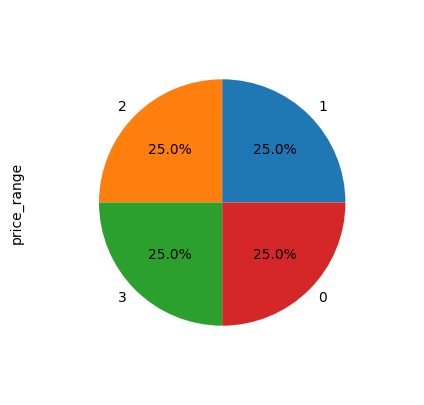

In [76]:
plt.figure(figsize=(5,5))
df['price_range'].value_counts().plot.pie(autopct="%1.1f%%", radius=.8)
plt.show()

 **detect the outliers we have more than methods like box plot and mathematics role IQR=Q3-Q1 with out plot
the range should be between
Q1-1.5*IQR and Q3+1.5*IQR in our case we will use a box plot to visualization and detect if the column has outliers and detect it from box plot graph**

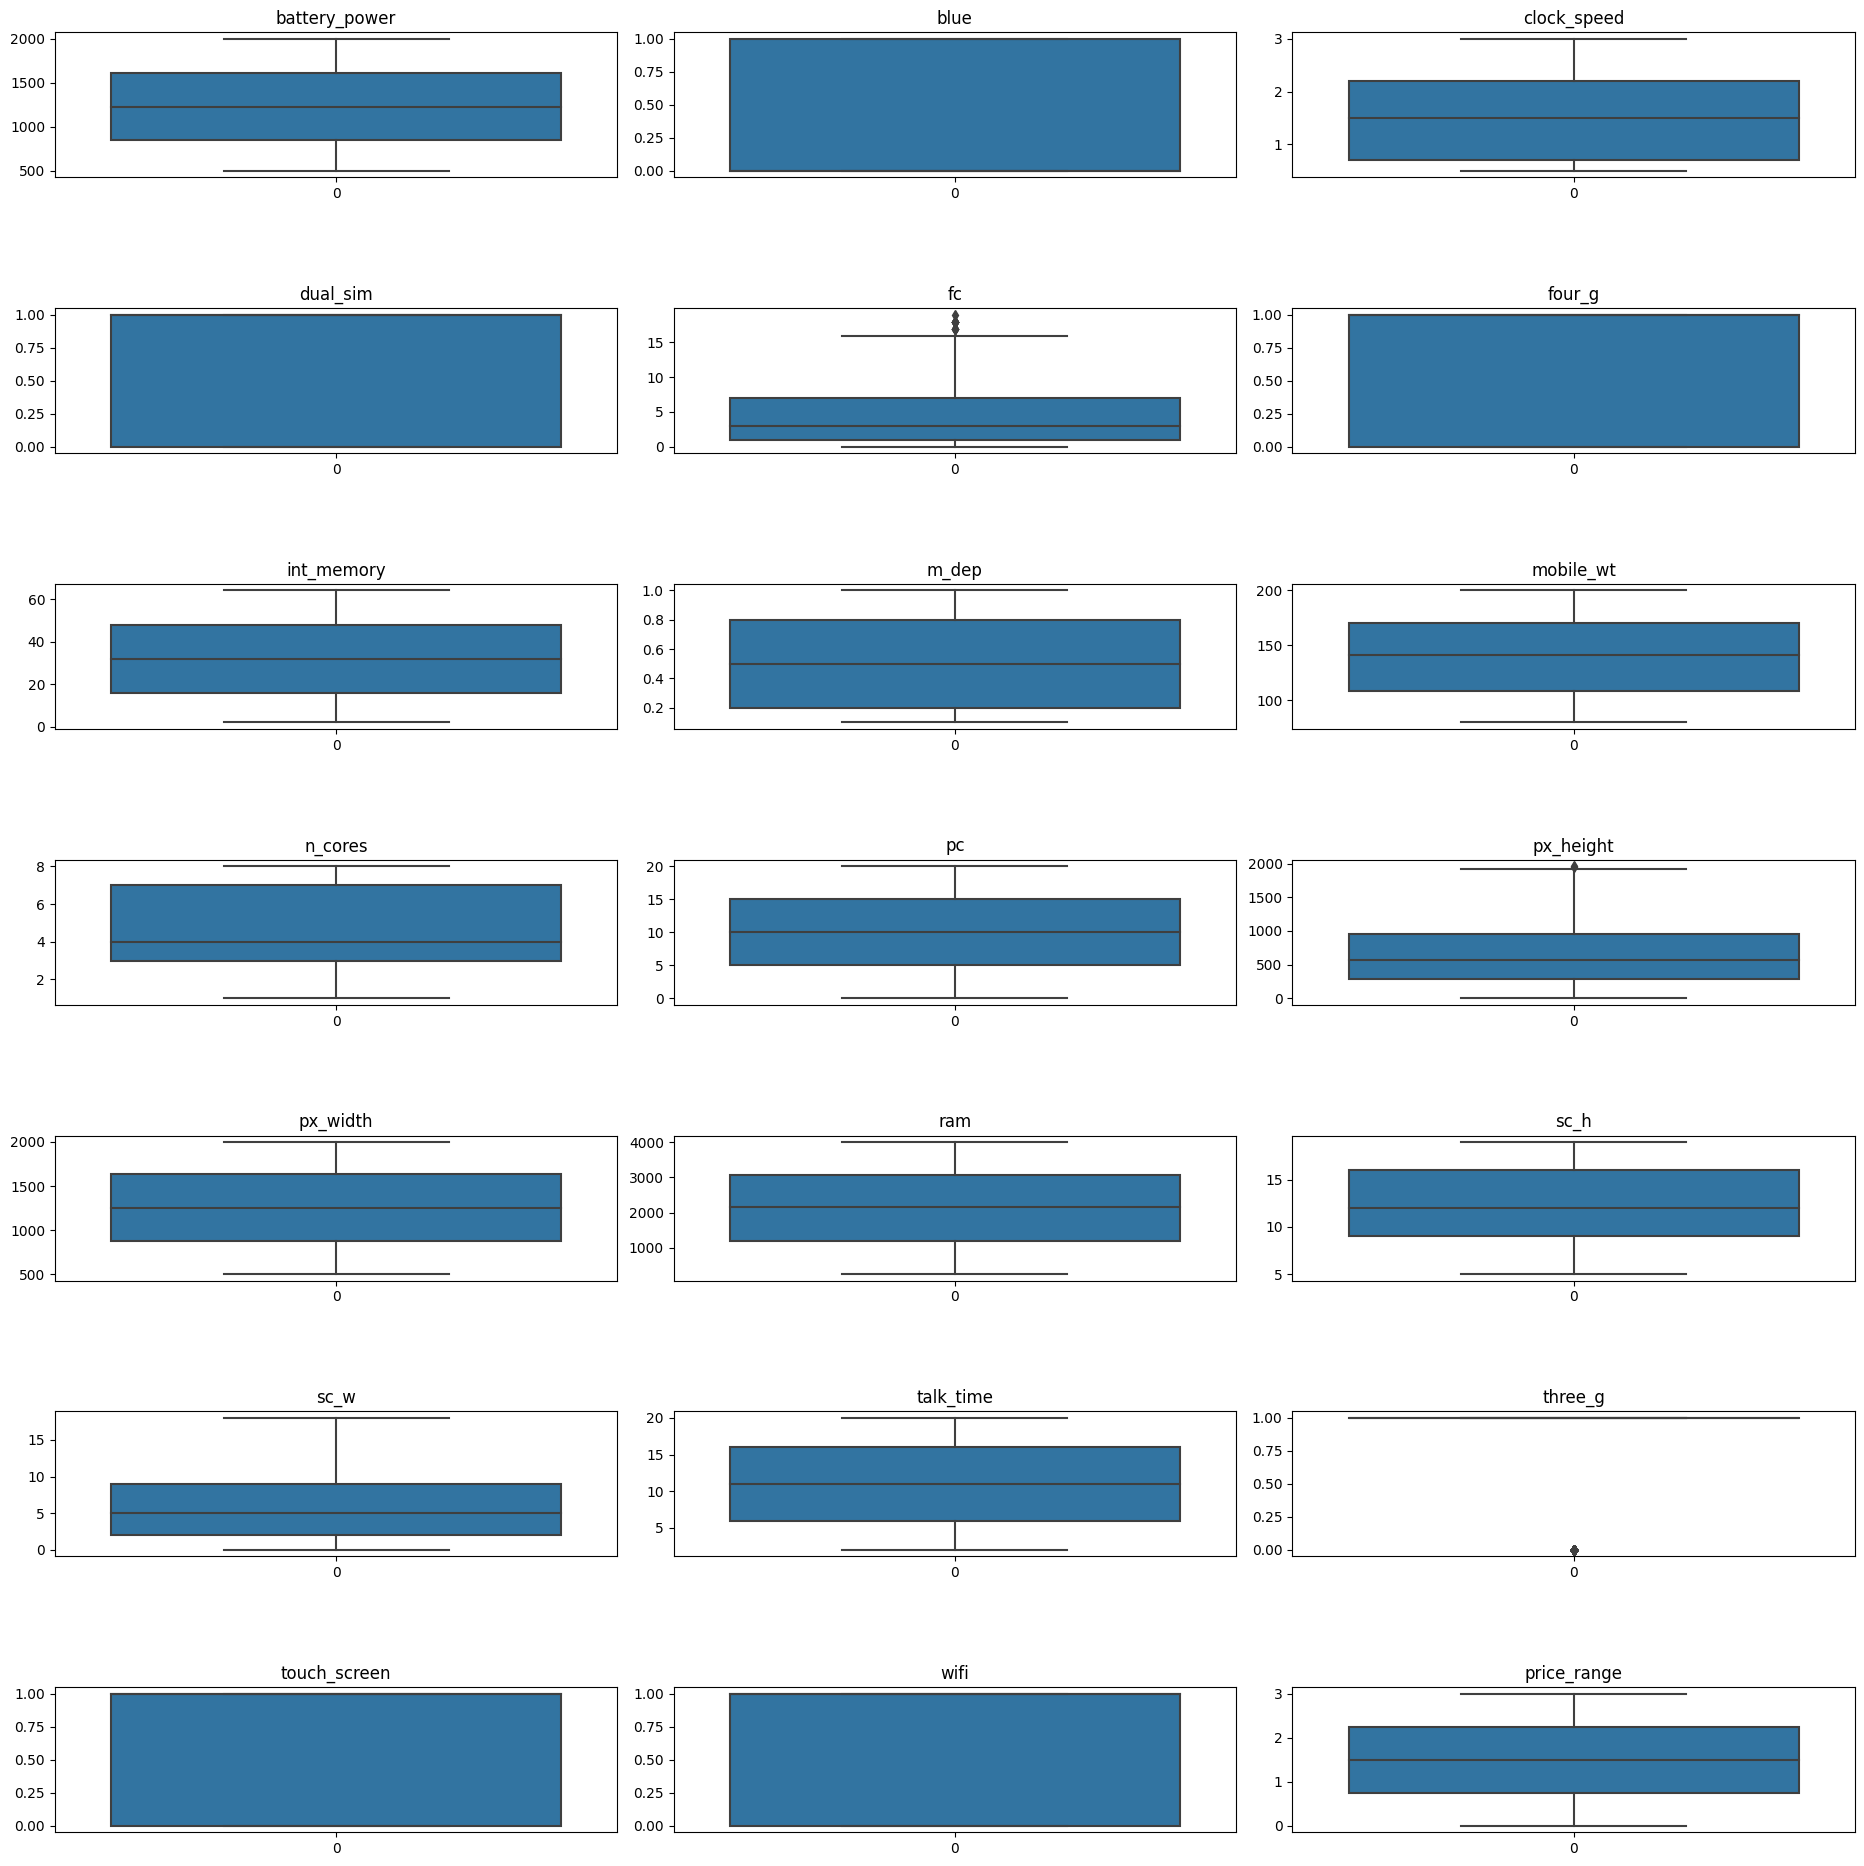

In [77]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20, 20)

for i in range(df.shape[1]):  # the number of numerical features
    plt.subplot(7,3,i+1)
    sns.boxplot(df.iloc[:,i])
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=1,
                        top=1,
                        wspace=0.1,
                              hspace=0.9)
    plt.title(df.columns.tolist()[i])

plt.show()

**get the features that has outliers from box plot**

In [78]:
outliers_cols=['fc','px_height']

#**remove the outliers in features that has outliers**

In [79]:
for i in outliers_cols:
  q1 = df[i].quantile(.25)
  q3  = df[i].quantile(.75)
  IQR=q3-q1
  min_range=q1-1.5*IQR
  max_range=q3 + 1.5*IQR
  df=df[(df[i] > min_range) & (df[i] < max_range)]


# **box plot of features that had had outliers after removeing it**

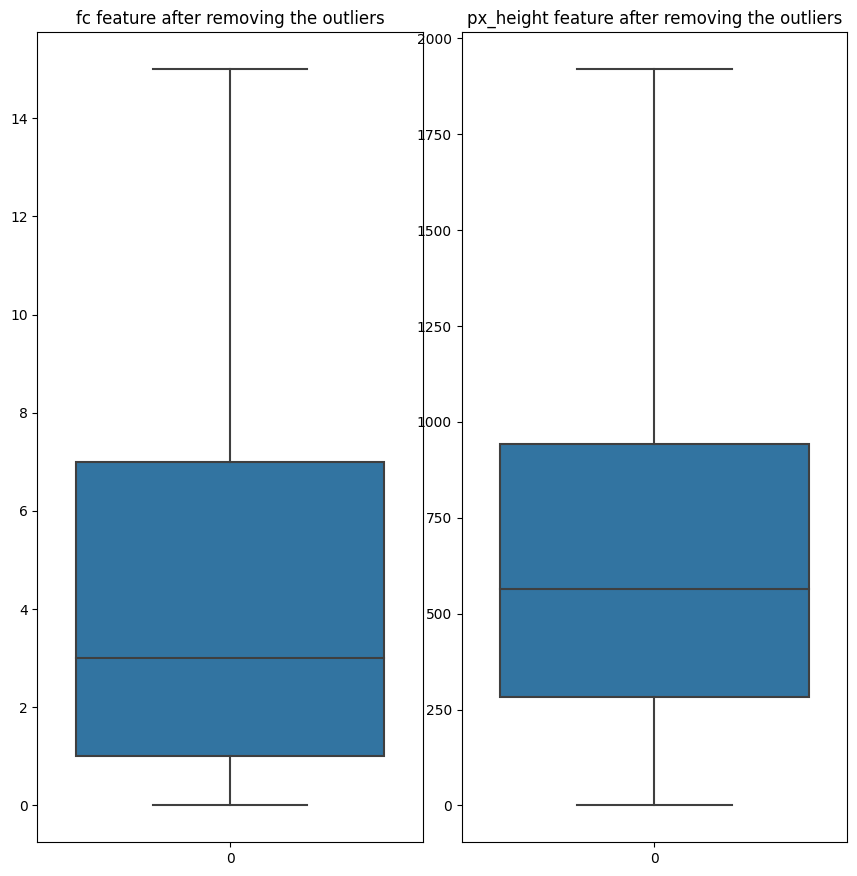

In [80]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (9, 9)
count=1
for i in  outliers_cols: # the number of numerical features
    plt.subplot(1,2,count)
    sns.boxplot(df[i])
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=1,
                        top=1,
                        wspace=0.1,
                              hspace=0.9)
    plt.title(i+" feature after removing the outliers")
    count+=1

plt.show()

In [81]:
print("the shape after deleting  outliers" , df.shape)

the shape after deleting  outliers (1956, 21)


# **features selection**
# **frist get the correlation betwenn features then drop the the features that has high correlation between them second select the features that has high corrrolation with target column (price_range) in our case i will use Features Selection using SelectKBest from sklearn it get better results**

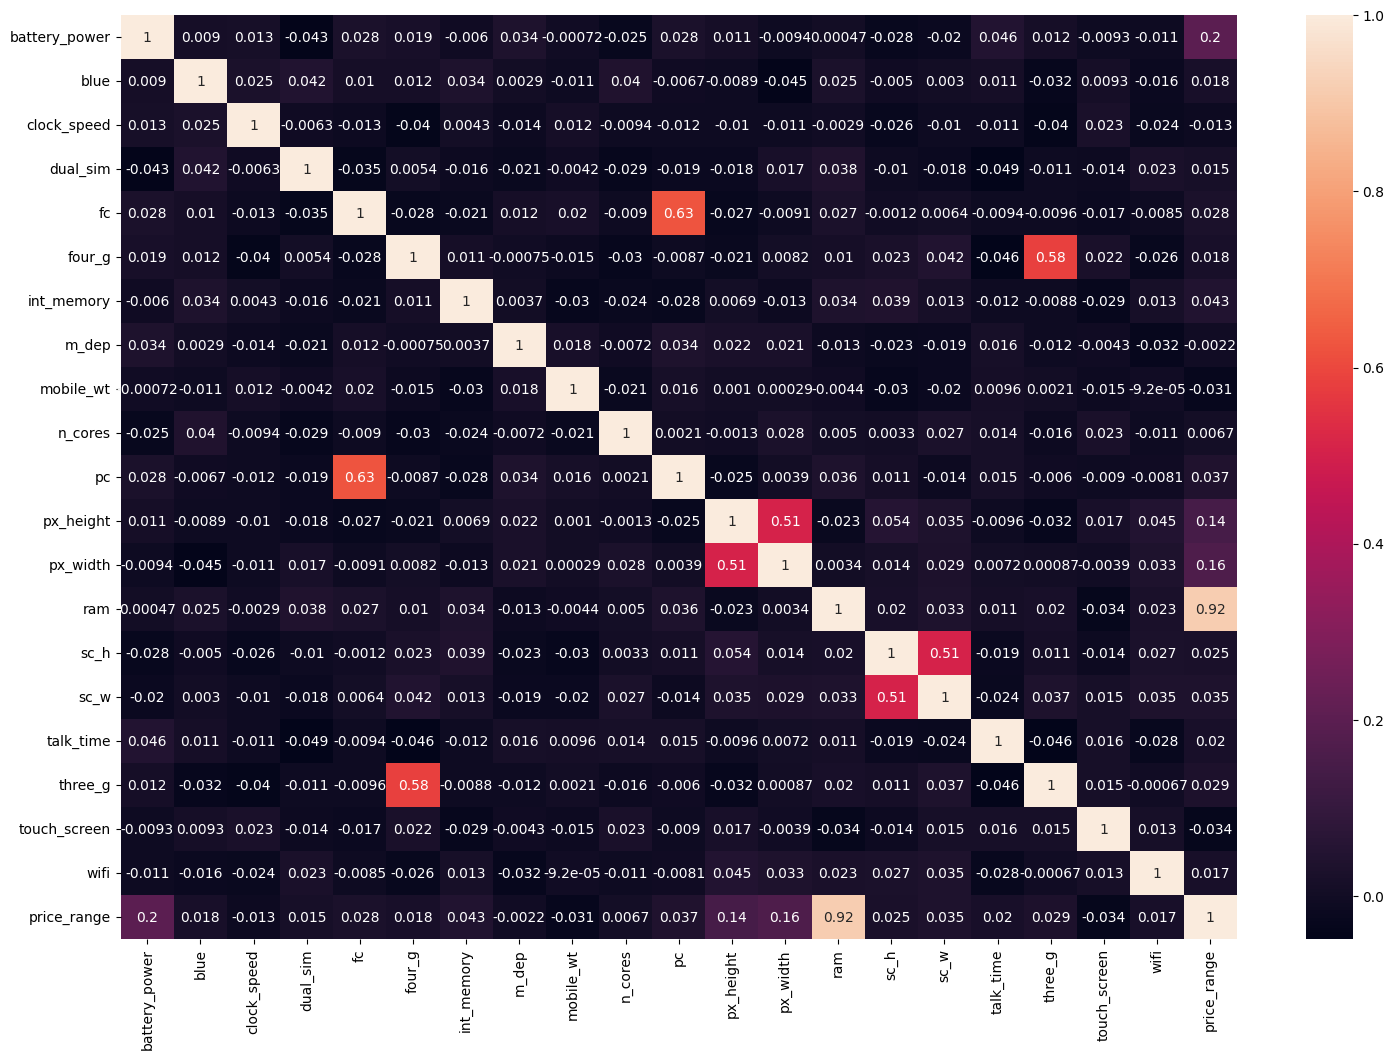

In [82]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [83]:
from sklearn.feature_selection import SelectKBest, chi2
# select top 12  features using chi-square test
selector = SelectKBest(chi2, k=12)
X_new = selector.fit_transform(df.drop(['price_range'], axis=1), df['price_range'])

In [84]:
# show the selected features
features = df.drop(['price_range'], axis=1).columns[selector.get_support()]
features

Index(['battery_power', 'fc', 'int_memory', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'],
      dtype='object')

# **features of high score**

In [85]:
features.tolist()

['battery_power',
 'fc',
 'int_memory',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

# **get x , y**

In [86]:
X=df[features.tolist()]
y=df['price_range']

# **split dataset**

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.10, random_state=47)

# **MinMaxScaler and  StandardScaler on train  and  test data we use the StandardScaler get best results**

In [88]:
from sklearn.preprocessing import MinMaxScaler
from joblib import dump,load

from sklearn.preprocessing import StandardScaler
# names = X_train.columns
scaler=StandardScaler()

# fit scaler on training data
scaler.fit(X_train)

# transform training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Save the scaler object to disk
dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [89]:
def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
    print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
    print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))


    cf1 = confusion_matrix(y_test,tree_predict)
    sns.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print(classification_report(y_train,  trained_model.predict(x_train)))
    print(classification_report(y_test,  trained_model.predict(x_test)))

In [90]:
def get_accuracy_NN(name, trained_model , x_train, y_train, x_test, y_test,y_train_enc,y_test_enc):
  loss,acc=model.evaluate(x_test,y_test_enc)
  print("test loss :", loss)
  print('test accuracy:',acc*100)
  print("____________________________")
  loss,acc=model.evaluate(x_train,y_train_enc)
  print("trainig loss :", loss)
  print('trainig accuracy:',acc*100)
  print("____________________________")

  pred=model.predict(x_test)
  pred_list=[]
  for i in pred:
    pred_list.append(np.argmax(i))
  cf1 = confusion_matrix(y_test,pred_list)
  sns.heatmap(cf1,annot=True,fmt = '.0f')
  plt.xlabel('prediction')
  plt.ylabel('Actual')
  plt.title(name+ ' Confusion Matrix')
  plt.show()
  print("true")
  print(classification_report(y_test,pred_list  ))

In [91]:
models=[]

# **classification models**

# **SVM**

Testing accuracy   : 98.46938775510205 %
MSE [TEST]          : 0.015306122448979591
Training accuracy  : 98.29545454545455 %
MSE [TRAIN]         : 0.017045454545454544
precision :  0.9846938775510204
recall    :  0.9846938775510204
f1_score  :  0.9846938775510204


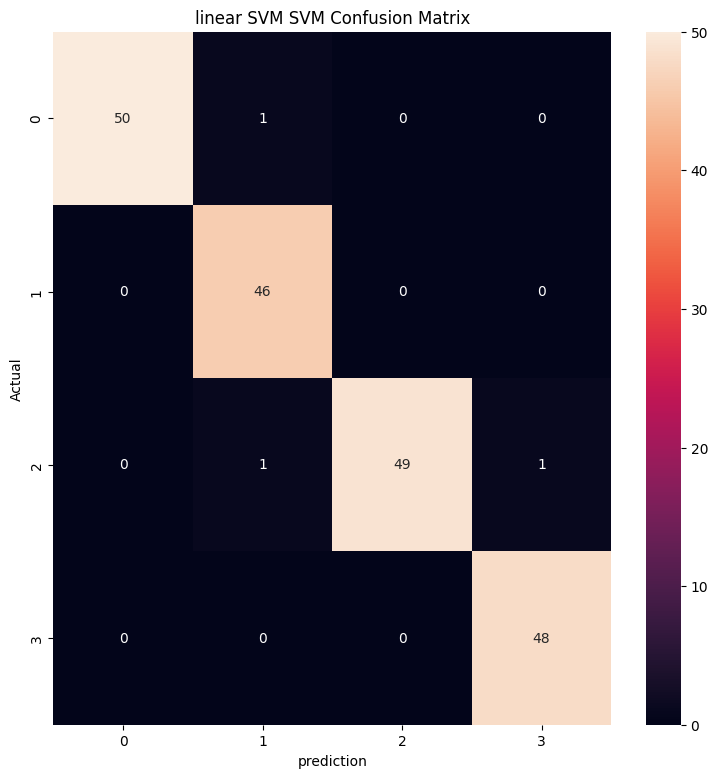

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       440
           1       0.98      0.97      0.98       440
           2       0.97      0.98      0.97       438
           3       0.99      0.98      0.99       442

    accuracy                           0.98      1760
   macro avg       0.98      0.98      0.98      1760
weighted avg       0.98      0.98      0.98      1760

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.96      1.00      0.98        46
           2       1.00      0.96      0.98        51
           3       0.98      1.00      0.99        48

    accuracy                           0.98       196
   macro avg       0.98      0.99      0.98       196
weighted avg       0.99      0.98      0.98       196



In [92]:
from sklearn.svm import SVC ,LinearSVC
SVC = SVC(C= 100,gamma= 1,kernel="linear").fit(X_train, y_train)
get_accuracy("linear SVM SVM", SVC , X_train, y_train, X_test, y_test)
models.append(['SVM',SVC])

# **LinearSVC**

Testing accuracy   : 76.53061224489795 %
MSE [TEST]          : 0.23469387755102042
Training accuracy  : 79.82954545454545 %
MSE [TRAIN]         : 0.20170454545454544
precision :  0.7653061224489796
recall    :  0.7653061224489796
f1_score  :  0.7653061224489794


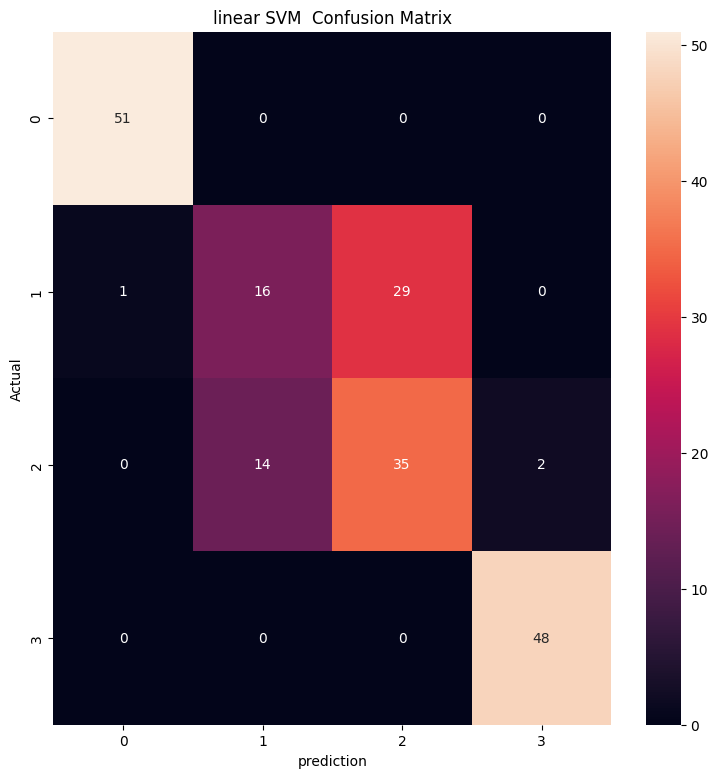

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       440
           1       0.70      0.41      0.52       440
           2       0.58      0.81      0.67       438
           3       0.99      0.97      0.98       442

    accuracy                           0.80      1760
   macro avg       0.81      0.80      0.79      1760
weighted avg       0.81      0.80      0.79      1760

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       0.53      0.35      0.42        46
           2       0.55      0.69      0.61        51
           3       0.96      1.00      0.98        48

    accuracy                           0.77       196
   macro avg       0.76      0.76      0.75       196
weighted avg       0.76      0.77      0.75       196



In [93]:
from sklearn.svm import LinearSVC
lSVC = LinearSVC(C= 100).fit(X_train, y_train)
get_accuracy("linear SVM ", lSVC , X_train, y_train, X_test, y_test)
models.append(['LSVM',lSVC])

Testing accuracy   : 97.95918367346938 %
MSE [TEST]          : 0.02040816326530612
Training accuracy  : 98.06818181818183 %
MSE [TRAIN]         : 0.019318181818181818
precision :  0.9795918367346939
recall    :  0.9795918367346939
f1_score  :  0.9795918367346939


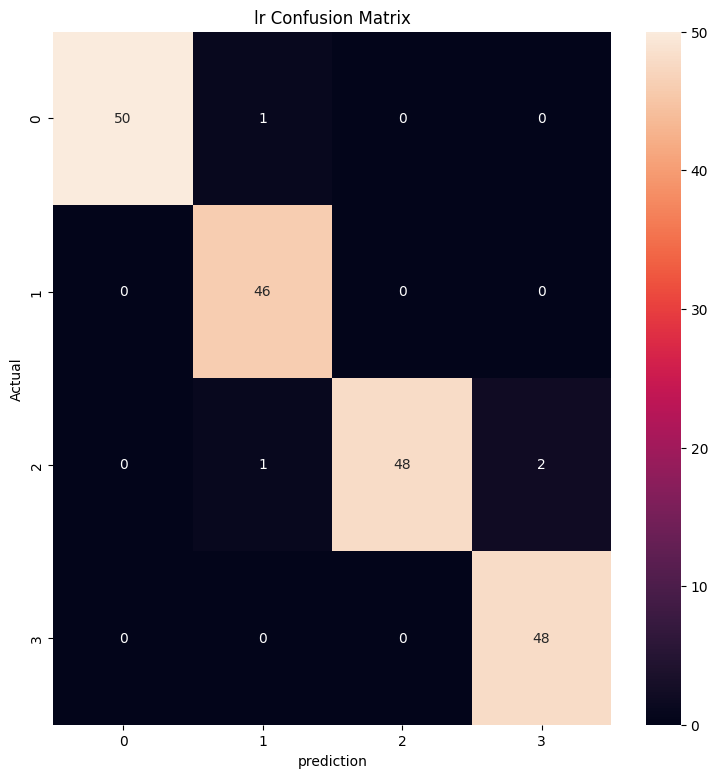

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       440
           1       0.98      0.98      0.98       440
           2       0.98      0.96      0.97       438
           3       0.98      0.99      0.98       442

    accuracy                           0.98      1760
   macro avg       0.98      0.98      0.98      1760
weighted avg       0.98      0.98      0.98      1760

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.96      1.00      0.98        46
           2       1.00      0.94      0.97        51
           3       0.96      1.00      0.98        48

    accuracy                           0.98       196
   macro avg       0.98      0.98      0.98       196
weighted avg       0.98      0.98      0.98       196



In [94]:
lr = LogisticRegression(C= 10, penalty= 'l2',solver= 'newton-cg',max_iter=1500).fit(X_train, y_train)
y_pred = lr.predict(X_test)

get_accuracy("lr",lr ,X_train , y_train , X_test   , y_test  )
models.append(['lr',lr])

# **DecisionTreeClassifier**

Testing accuracy   : 83.6734693877551 %
MSE [TEST]          : 0.16326530612244897
Training accuracy  : 100.0 %
MSE [TRAIN]         : 0.0
precision :  0.8367346938775511
recall    :  0.8367346938775511
f1_score  :  0.8367346938775511


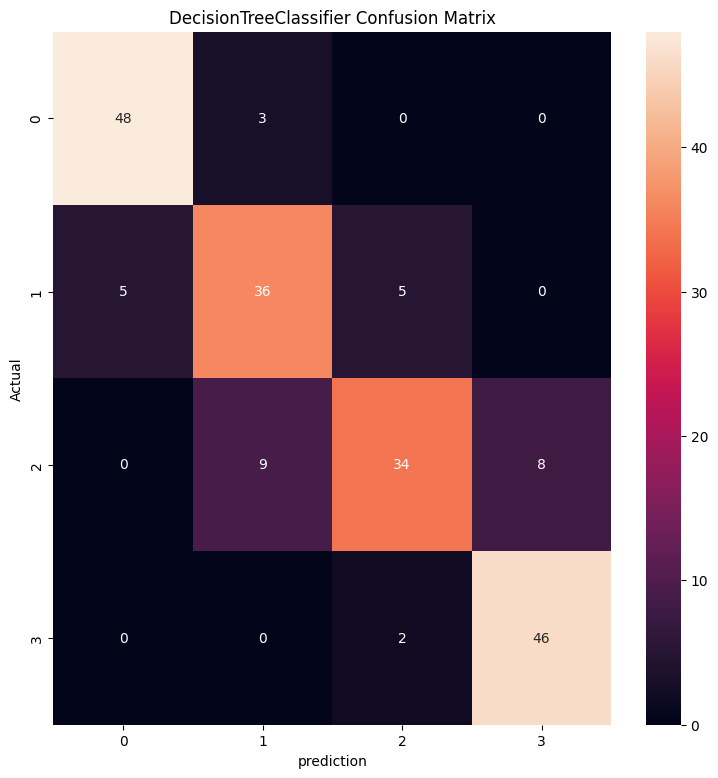

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       440
           1       1.00      1.00      1.00       440
           2       1.00      1.00      1.00       438
           3       1.00      1.00      1.00       442

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        51
           1       0.75      0.78      0.77        46
           2       0.83      0.67      0.74        51
           3       0.85      0.96      0.90        48

    accuracy                           0.84       196
   macro avg       0.83      0.84      0.83       196
weighted avg       0.84      0.84      0.83       196



In [95]:
dt= DecisionTreeClassifier(criterion= 'gini', max_depth= 395).fit(X_train, y_train)
y_pred = dt.predict(X_test)

get_accuracy("DecisionTreeClassifier",dt, X_train , y_train , X_test   , y_test )
models.append(['dt',dt])

Testing accuracy   : 91.3265306122449 %
MSE [TEST]          : 0.08673469387755102
Training accuracy  : 100.0 %
MSE [TRAIN]         : 0.0
precision :  0.9132653061224489
recall    :  0.9132653061224489
f1_score  :  0.9132653061224489


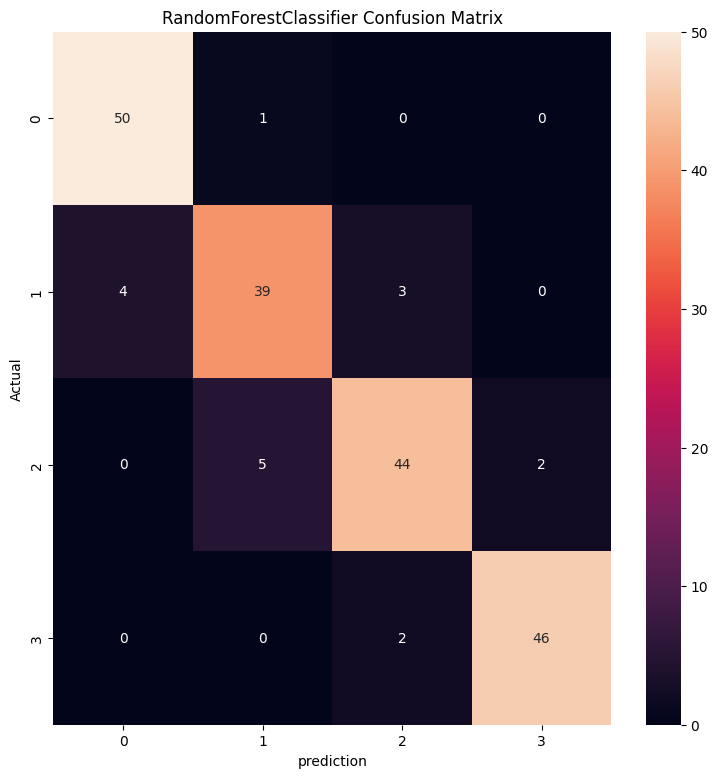

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       440
           1       1.00      1.00      1.00       440
           2       1.00      1.00      1.00       438
           3       1.00      1.00      1.00       442

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        51
           1       0.87      0.85      0.86        46
           2       0.90      0.86      0.88        51
           3       0.96      0.96      0.96        48

    accuracy                           0.91       196
   macro avg       0.91      0.91      0.91       196
weighted avg       0.91      0.91      0.91       196



In [96]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(criterion= 'gini',max_depth= 20, max_features='sqrt',n_estimators=1000).fit(X_train, y_train)
y_pred = RF.predict(X_test)
models.append(['RandomForestClassifier',RF])
get_accuracy("RandomForestClassifier" ,RF, X_train , y_train , X_test   , y_test  )


# **conclusion**
# **tree based model is not better in this case becouse the data not catigrical data if the dataset is catigorical data the tree based model will get perfect results**

to catorical

In [97]:
y_train_enc=to_categorical(y_train)
y_test_enc=to_categorical(y_test)

# **neural network**

In [98]:
model=Sequential()
model.add(Dense( 10 ,input_shape=(X_train.shape[1],),activation='relu' ))

#model.add(Dense(15, activation='relu'))
#model.add(Dense(10, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))


model.compile(optimizer = 'adam' ,loss = 'categorical_crossentropy' ,metrics=['accuracy'])

In [99]:
model.fit(X_train,y_train_enc,batch_size=256 ,epochs=600)

Epoch 1/600
7/7 [==============================] - 1s 20ms/step - loss: 1.6843 - accuracy: 0.2608
Epoch 2/600
7/7 [==============================] - 0s 4ms/step - loss: 1.6463 - accuracy: 0.2653
Epoch 3/600
7/7 [==============================] - 0s 8ms/step - loss: 1.6117 - accuracy: 0.2688
Epoch 4/600
7/7 [==============================] - 0s 4ms/step - loss: 1.5789 - accuracy: 0.2727
Epoch 5/600
7/7 [==============================] - 0s 3ms/step - loss: 1.5499 - accuracy: 0.2801
Epoch 6/600
7/7 [==============================] - 0s 7ms/step - loss: 1.5219 - accuracy: 0.2852
Epoch 7/600
7/7 [==============================] - 0s 3ms/step - loss: 1.4960 - accuracy: 0.2943
Epoch 8/600
7/7 [==============================] - 0s 3ms/step - loss: 1.4718 - accuracy: 0.2989
Epoch 9/600
7/7 [==============================] - 0s 3ms/step - loss: 1.4501 - accuracy: 0.3045
Epoch 10/600
7/7 [==============================] - 0s 3ms/step - loss: 1.4289 - accuracy: 0.3068
Epoch 11/600
7/7 [==========

7/7 [==============================] - 1s 4ms/step - loss: 0.1202 - accuracy: 0.9643
test loss : 0.12018121778964996
test accuracy: 96.42857313156128
____________________________
55/55 [==============================] - 0s 4ms/step - loss: 0.0792 - accuracy: 0.9841
trainig loss : 0.07916498184204102
trainig accuracy: 98.40909242630005
____________________________
7/7 [==============================] - 0s 4ms/step


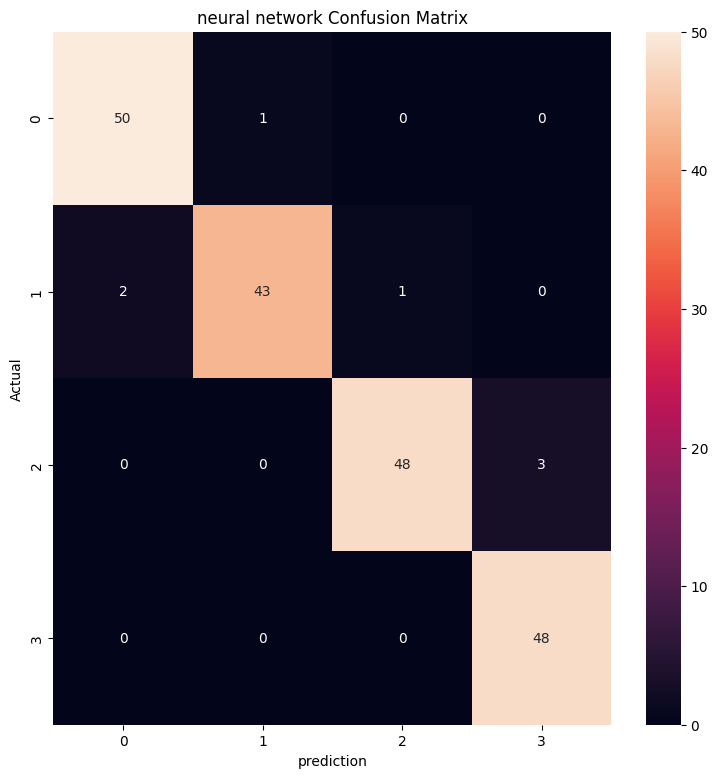

true
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.98      0.93      0.96        46
           2       0.98      0.94      0.96        51
           3       0.94      1.00      0.97        48

    accuracy                           0.96       196
   macro avg       0.96      0.96      0.96       196
weighted avg       0.96      0.96      0.96       196



In [100]:
pred=model.predict(X_test)
get_accuracy_NN("neural network", model , X_train, y_train, X_test, y_test,y_train_enc,y_test_enc)

In [101]:
models.append(['neural network',model])

In [105]:
for i in range (len(models)-1):

  print(models[i][0]," loss : ",mean_squared_error(y_test,models[i][1].predict(X_test)))

SVM  loss :  0.015306122448979591
LSVM  loss :  0.23469387755102042
lr  loss :  0.02040816326530612
dt  loss :  0.16326530612244897
RandomForestClassifier  loss :  0.08673469387755102


The Data Preprocessing
I. Description of Data

II. Info about the data

III. Check if the data has missing values or not

IV. Detecting outliers

V. The Correlation between the attributes

VI. Features Selection using SelectKBest

VII. CHeck if the data balanced or not

VIII. The attributes that are most correlated with the Price Range ( Our target )

Applyed Models :
(1) Logistic Regression

(2) Decision Tree(gini)

(3) Random Forest

(4) KNN

(5) Naive Bayes

(6) LSVM

Hyperparameters
W used GridSearch algorithm to select the best hyperparameters for our models and get the best result for every model we used .

Conclusion
We compared the accuracies of all the models and found that LSVM is the best classifier for our project

In [106]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(SVC, f)